In [4]:
import pandas as pd 

data = pd.read_csv('/Users/lmruwork/Desktop/Education/Masters/project_year_1/hse-2023-slr/data/raw/annotations.csv', delimiter = '\t')

In [6]:
data.train.value_counts()

train
True     15300
False     5100
Name: count, dtype: int64

## Исследуем сколько различных жестов есть в датасете

In [7]:
data['text'].value_counts()

text
no_event        400
восемьдесят      20
хороший          20
тот              20
шум              20
               ... 
мотивировать     20
вдохновлять      20
непреклонный     20
рассердиться     20
сказать          20
Name: count, Length: 1001, dtype: int64

### Всего у нас 1000 классов жестов и 1 класс, отвечающий за отстуствие жеста. Посчитаем количество слов в жестах и построим распределение.

In [8]:
unique_texts = data['text'].unique()

# Не учитываем пустое значение
unique_texts = unique_texts[unique_texts != 'no_event']

unique_word_count = []

for text in unique_texts:
    word_count = len(str(text).split())
    unique_word_count.append({'text': text, 'word_count': word_count})

unique_word_count_df = pd.DataFrame(unique_word_count)

unique_word_count_df

,text,word_count
0,Ё,1
1,А,1
2,Р,1
3,Е,1
4,Ч,1
...,...,...
995,продление,1
996,башенные часы,2
997,в то время как,4
998,время 11 часов,3


In [9]:
unique_word_count_df['word_count'].value_counts()

word_count
1    932
2     45
3     18
4      4
7      1
Name: count, dtype: int64

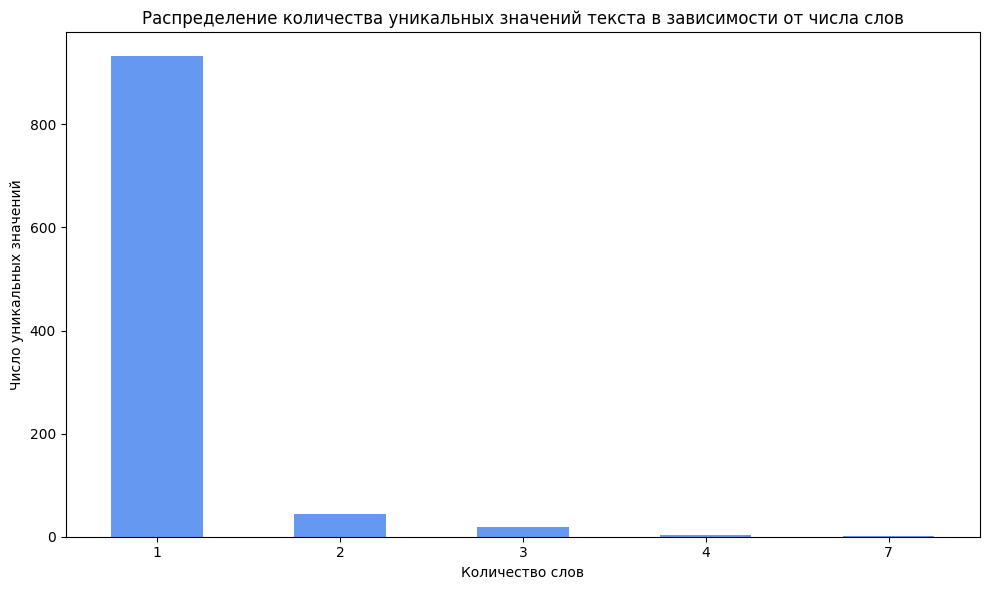

In [12]:
import matplotlib.pyplot as plt

word_count_counts = unique_word_count_df['word_count'].value_counts()

plt.figure(figsize=(10, 6))
word_count_counts.sort_index().plot(kind='bar', color='#6599f1')

plt.title('Распределение количества уникальных значений текста в зависимости от числа слов')
plt.xlabel('Количество слов')
plt.ylabel('Число уникальных значений')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Из данных видно, что большая часть жестов состоит из 1-го слова, но например есть жест, состоящий из 7-и слов.

In [8]:
unique_word_count_df[unique_word_count_df['word_count'] == 7]

,text,word_count
878,время от 0 ночи до 12 дня,7


## Построим распределение расширений видео

In [18]:
video_resolution_counts = (
    data
    .groupby(['height', 'width'])
    .size()
    .reset_index(name='video_count')
    .sort_values(by='video_count', ascending=False)
)

video_resolution_counts

,height,width,video_count
38,1920,1080,10300
15,1280,720,4948
0,720,1280,1910
31,1920,822,1599
6,1080,1920,689
27,1440,1440,265
37,1920,960,239
34,1920,886,152
39,1920,1088,118
33,1920,880,52


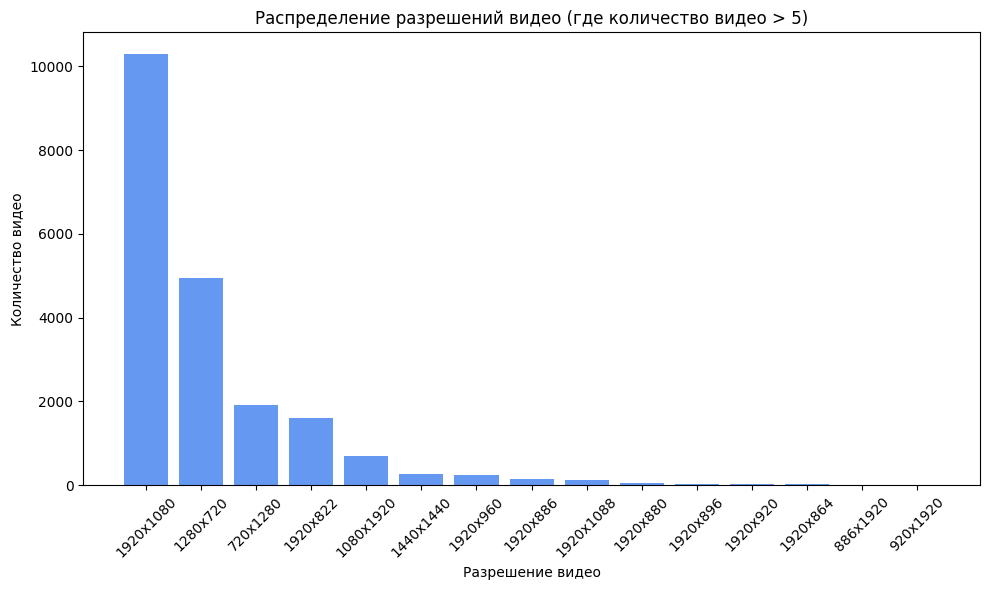

In [19]:
filtered_resolutions = video_resolution_counts[video_resolution_counts['video_count'] > 5]

plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_resolutions)), filtered_resolutions['video_count'], color='#6599f1')

plt.xticks(range(len(filtered_resolutions)), [f"{h}x{w}" for h, w in zip(filtered_resolutions['height'], filtered_resolutions['width'])], rotation=45)
plt.xlabel('Разрешение видео')
plt.ylabel('Количество видео')

plt.title('Распределение разрешений видео (где количество видео > 5)')

plt.tight_layout()
plt.show()

## Найдем среднюю и медиану длины видео

In [11]:
print(f"Mean video length: {data['length'].mean()}")
print(f"Median video length: {data['length'].median()}")

Mean video length: 50.32171568627451
Median video length: 47.0


## Рассмотрим количество кадров в видео

In [23]:
from pathlib import Path
from collections import defaultdict
import cv2

frames = defaultdict(int)

for data_type in ['train', 'test']:
    video_path_dir = Path.cwd().parent / Path(f'data/raw/{data_type}')

    for video_file_path in video_path_dir.iterdir():

        if str(video_file_path.name).startswith('.'):
            pass

        cap = cv2.VideoCapture(str(video_file_path))

        frames[int(cap.get(cv2.CAP_PROP_FRAME_COUNT))] += 1 

        cap.release()

OpenCV: Couldn't read video stream from file "/Users/lmruwork/Desktop/Education/Masters/project_year_1/hse-2023-slr/data/raw/train/.gitkeep"
OpenCV: Couldn't read video stream from file "/Users/lmruwork/Desktop/Education/Masters/project_year_1/hse-2023-slr/data/raw/test/.DS_Store"
OpenCV: Couldn't read video stream from file "/Users/lmruwork/Desktop/Education/Masters/project_year_1/hse-2023-slr/data/raw/test/.gitkeep"


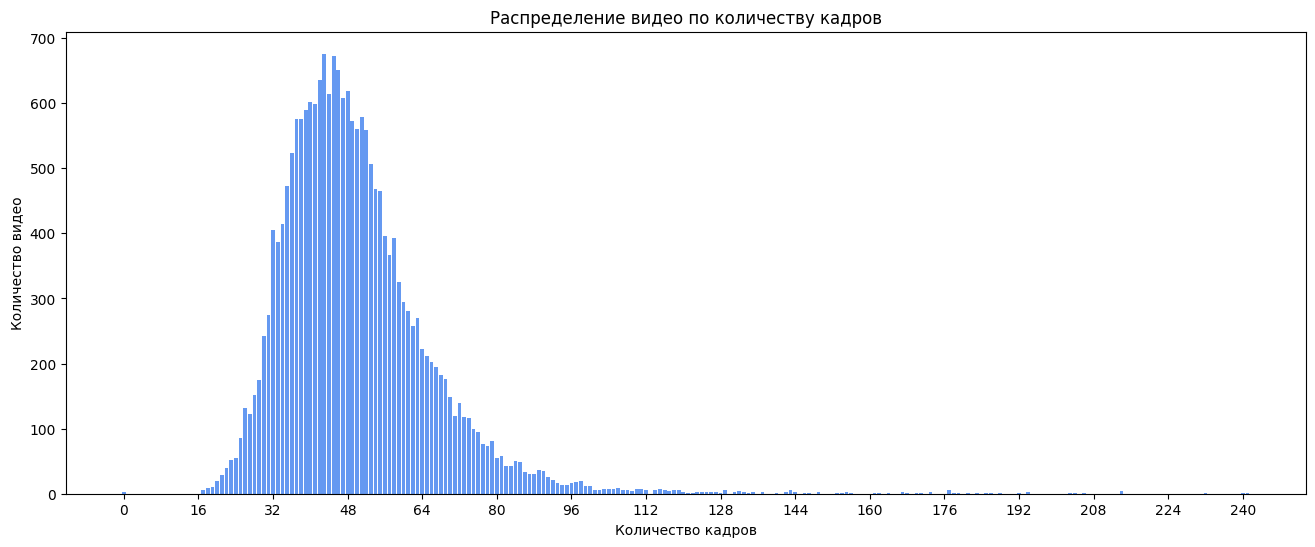

In [26]:
frame_counts = list(frames.keys())
video_counts = list(frames.values())

plt.figure(figsize=(16, 6))
plt.bar(frame_counts, video_counts, color='#6599f1')

plt.xticks(range(0, 256, 16))
plt.xlabel('Количество кадров')
plt.ylabel('Количество видео')
plt.title('Распределение видео по количеству кадров')


plt.show()

In [41]:
total_videos = sum(video_counts)
total_frames = sum(frame * count for frame, count in frames.items())

average_frames_per_video = total_frames / total_videos

print(f'Среднее количество фреймов: {average_frames_per_video}')

Среднее количество фреймов: 49.70828431372549


# Участники процесса записи видео

### Количество уникальных пользователей

In [33]:
(
    data.user_id
    .nunique()
)

194

### Среднее и медианное количество видео от пользователя

In [50]:
(
    data
    .groupby('user_id')['attachment_id']
    .count()
    .agg(['mean', 'median'])
)

mean      105.154639
median     13.000000
Name: attachment_id, dtype: float64

### Распределение количества видео от одного пользователя

In [79]:
num_videos_by_users = (
    data
    .groupby('user_id')['attachment_id']
    .count()
    .sort_values(ascending=False)
    .to_frame('count_videos')
)

num_videos_by_users.head(10)

,count_videos
user_id,
db573f94204e56e0cf3fc2ea000e5bdc,3692
0211b488644476dd0fec656ccb9b74fc,3516
185bd3a81d9d618518d10abebf0d17a8,2695
46dd04a1caa75ed3082b573cb5a3ad26,1869
b07a773bcb10b4f14f33d2b0e8ec58ba,1138
95af8e702c909eee7145c6dc1a3d756b,616
2d84da20c251acaeb3186642fcb04f2e,400
fc6e5caa3dc328e7558b072e6607e399,221
4299b8ccf39ace57287b463fbe4a489b,180


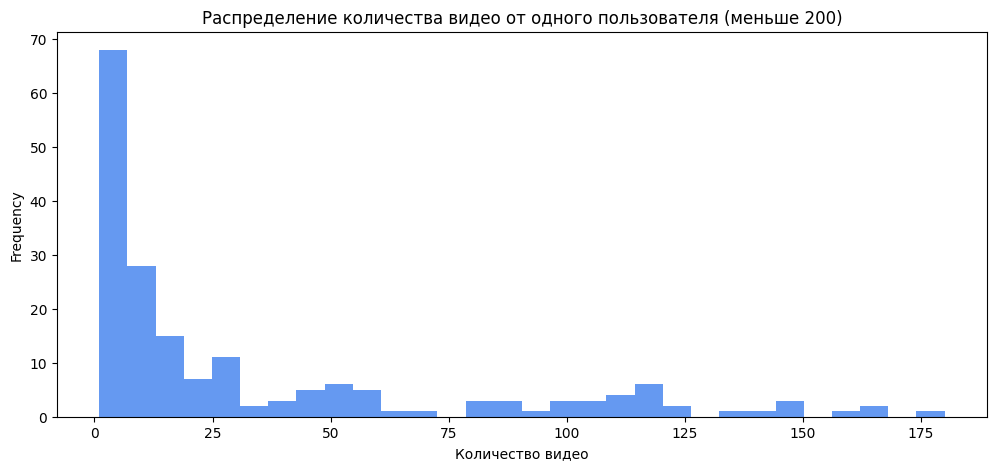

In [83]:
fig, ax = plt.subplots(figsize=[12, 5])

ax = (
    data
    .groupby('user_id')['attachment_id']
    .count()
    .sort_values(ascending=False)
    .to_frame('count_videos')
    .query('count_videos < 200')
    .plot(kind='hist', bins=30, color='#6599f1', title='Распределение количества видео от одного пользователя (меньше 200)', ax=ax)
)

ax.set_xlabel('Количество видео')
ax.get_legend().remove()

### Количества видео от одного пользователя на каждый класс

In [117]:
(
    data
    .groupby(['user_id', 'text'])['attachment_id']
    .count()
    .agg(['mean', 'median'])
)

mean      1.829761
median    1.000000
Name: attachment_id, dtype: float64

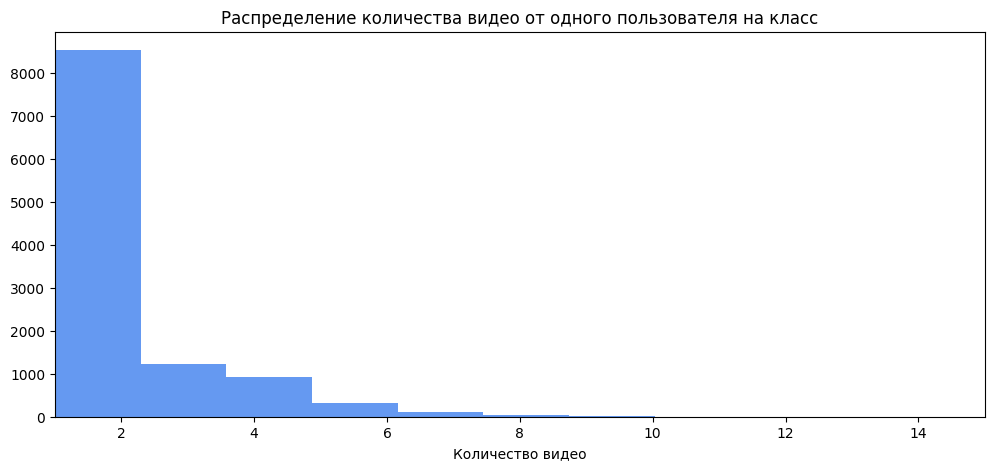

In [116]:
fig, ax = plt.subplots(figsize=[12, 5])

(
    data
    .groupby(['user_id', 'text'])['attachment_id']
    .count()
    .plot(kind='hist', bins=100, color='#6599f1', title='Распределение количества видео от одного пользователя на класс', ax=ax)
)

ax.set_xlim(1, 15)
ax.set_xlabel('Количество видео')
ax.set_ylabel('');